In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
pos_neg_pet   = {1: [41, 32], 2: [41, 32], 3: [41, 32], 4: [41, 32], 5: [41, 32],
                 6: [41, 32], 7: [41, 31], 8: [41, 31], 9: [41, 31], 10: [41, 31]}
pos_neg_petdx = {1: [19, 13], 2: [19, 13], 3: [18, 14], 4: [18, 14], 5: [18, 14],
                 6: [18, 14], 7: [18, 14], 8: [18, 13], 9: [18, 13], 10: [18, 13]}
pos_neg_load  = {1: [101, 59], 2: [101, 59], 3: [101, 59], 4: [101, 59], 5: [101, 59],
                 6: [102, 58], 7: [102, 58], 8: [102, 58], 9: [102, 58], 10: [101, 58]}

In [38]:
pet_GNN     = pd.read_csv('results/2022_03_networks_PET.csv', index_col='fold')
pet_bas     = pd.read_csv('results/2022_03_baseline_models_PET.csv',  index_col='fold')
petdx_GNN   = pd.read_csv('results/2022_03_networks_PETandDX.csv', index_col='fold')
petdx_bas   = pd.read_csv('results/2022_03_baseline_models_PETandDX.csv',  index_col='fold')
load_GNN    = pd.read_csv('results/2022_04_networks_LOAD.csv', index_col='fold')
load_bas    = pd.read_csv('results/2022_03_baseline_models_LOAD.csv',  index_col='fold')

In [39]:
pet_GNN = pet_GNN.loc[(pet_GNN['dataset'] == 'AD PPT-Ohmnet')]
pet_bas = pet_bas.loc[(pet_bas['dataset'] == 'Only APOE')]
pet_GNN['total'] = pet_GNN.index.map(pos_neg_pet)
pet_bas['total'] = pet_bas.index.map(pos_neg_pet)

petdx_GNN = petdx_GNN.loc[(petdx_GNN['dataset'] == 'AD PPT-Ohmnet')]
petdx_bas = petdx_bas.loc[(petdx_bas['dataset'] == 'Only APOE')]
petdx_GNN['total'] = petdx_GNN.index.map(pos_neg_petdx)
petdx_bas['total'] = petdx_bas.index.map(pos_neg_petdx)

load_GNN = load_GNN.loc[(load_GNN['dataset'] == 'AD PPT-Ohmnet')]
load_bas = load_bas.loc[(load_bas['dataset'] == 'Only APOE')]
load_GNN['total'] = load_GNN.index.map(pos_neg_load)
load_bas['total'] = load_bas.index.map(pos_neg_load)

In [43]:
def calculate_cm(positives, negatives, pre, rec):
    
    TP = rec * (positives)
    FP = (-pre*TP + TP)/pre
    TN = negatives - FP
    FN = positives - TP

    TN = round(TN, 0)
    FN = round(FN, 0)
    TP = round(TP, 0)
    FP = round(FP, 0)

#     print(TN, FP, FN, TP)
#     print(TP/(TP+FP))

    cm = [[TN, FP],[FN, TP]]
    cmn  = [[TN/negatives, FP/negatives],[FN/positives, TP/positives]]
    
    return cm, cmn



In [56]:
def compare_conf_matrices(bas_df, gnn_df):
    
    for k in range(10):
        k += 1

        fold_data_bas = bas_df.loc[k]
        fold_data_gnn = gnn_df.loc[k]

        # Metrics for baseline
        rec_bas, pre_bas = fold_data_bas['rec'], fold_data_bas['pre']
        pos_bas, neg_bas = fold_data_bas['total'][0], fold_data_bas['total'][1]
        print('Baseline', k, pre_bas, rec_bas, pos_bas, neg_bas)
        cm_bas, cm_norm_bas = calculate_cm(pos_bas, neg_bas, pre_bas, rec_bas)

        # Metrics for GNN
        rec_gnn, pre_gnn = fold_data_gnn['rec'], fold_data_gnn['pre']
        pos_gnn, neg_gnn = fold_data_gnn['total'][0], fold_data_gnn['total'][1]
        print('GNN', k, pre_gnn, rec_gnn, pos_gnn, neg_gnn)
        cm_gnn, cm_norm_gnn = calculate_cm(pos_gnn, neg_gnn, pre_gnn, rec_gnn)

        plt.figure(figsize=(8, 3))
        plt.subplot(1, 2, 1)
        sns.heatmap(cm_norm_bas, annot=True, vmin=0, vmax=1, cmap='Blues')
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.title(f'Fold {k} - Baseline model')

        plt.subplot(1, 2, 2)
        sns.heatmap(cm_norm_gnn, annot=True, vmin=0, vmax=1, cmap='Blues')
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.title(f'Fold {k} - GNN model')

        plt.show()
    

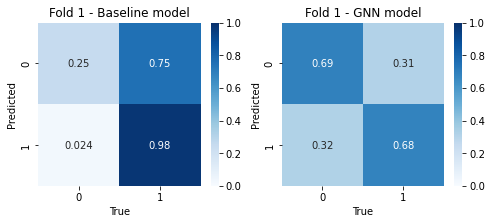

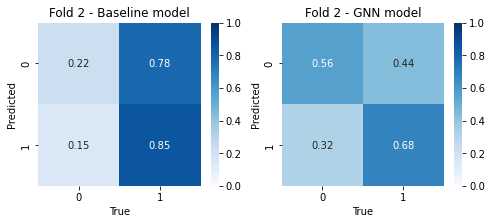

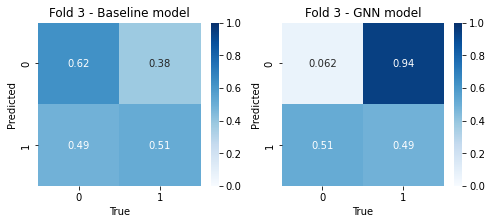

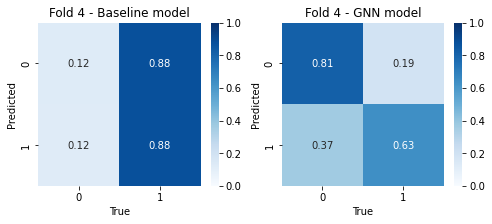

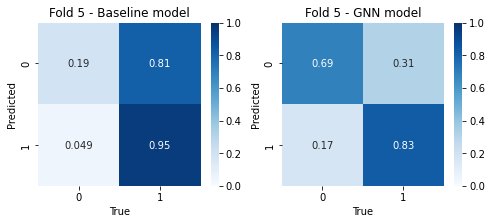

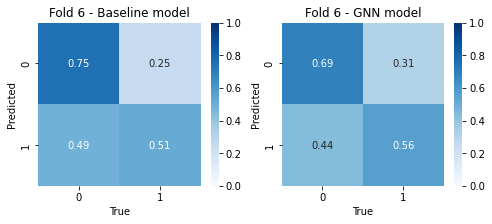

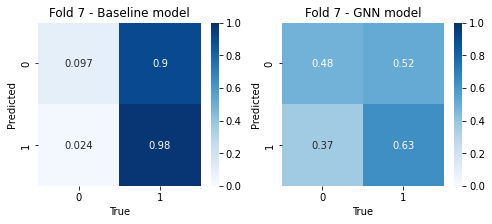

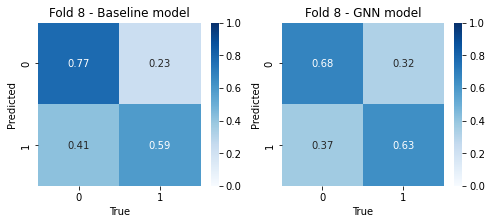

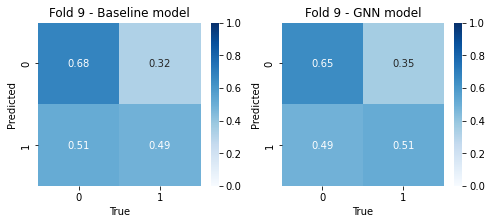

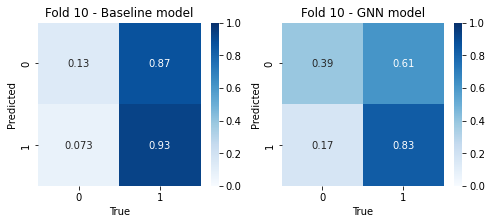

In [53]:
compare_conf_matrices(pet_bas, pet_GNN)

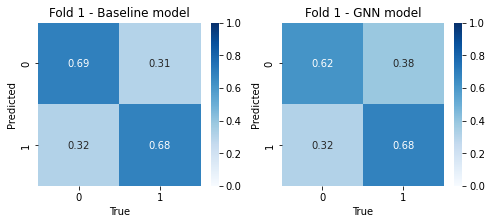

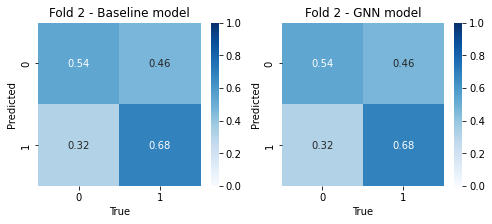

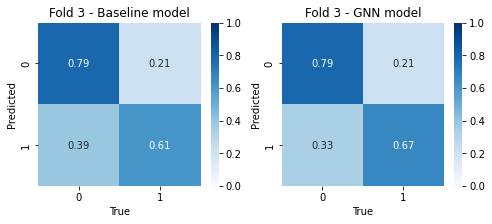

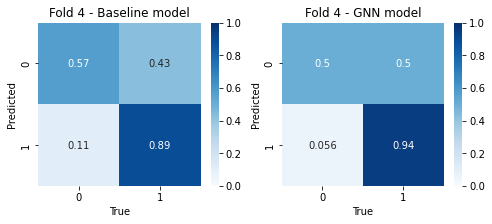

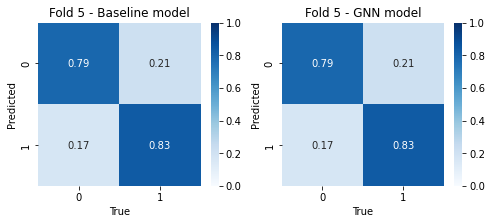

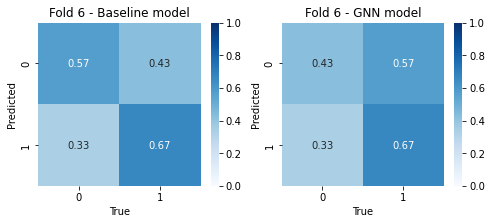

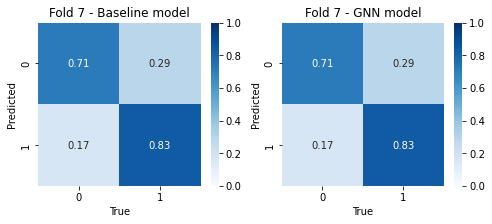

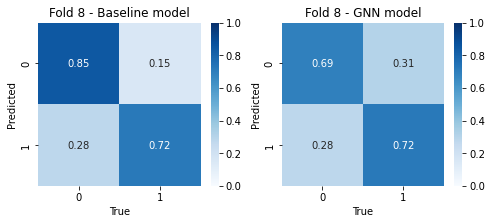

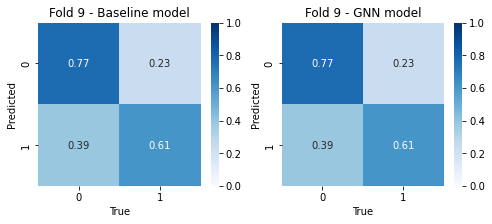

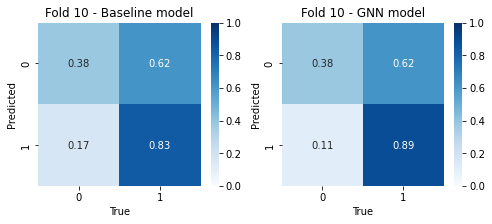

In [54]:
compare_conf_matrices(petdx_bas, petdx_GNN)

Baseline 1 0.782051282051282 0.6039603960396039 101 59
GNN 1 0.7501 0.6898 101 59


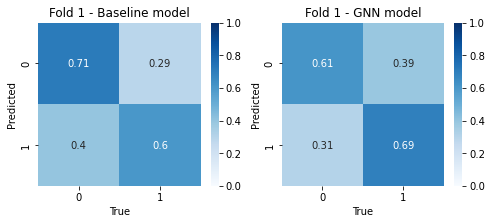

Baseline 2 0.7528089887640449 0.6633663366336634 101 59
GNN 2 0.4208 0.6667 101 59


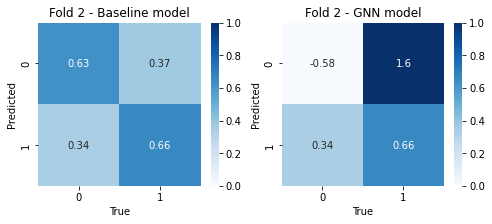

Baseline 3 0.7525773195876289 0.7227722772277227 101 59
GNN 3 0.6735 0.9142 101 59


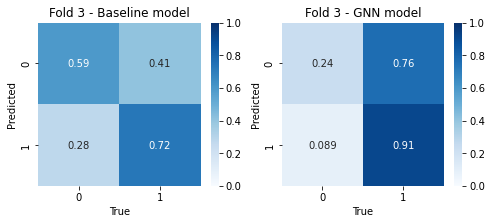

Baseline 4 0.7441860465116279 0.6336633663366337 101 59
GNN 4 0.7386 0.6436 101 59


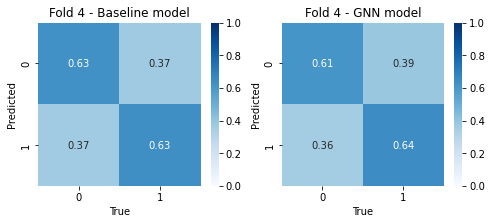

Baseline 5 0.7 0.6237623762376238 101 59
GNN 5 0.6817 0.8746 101 59


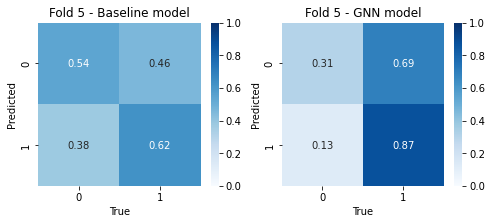

Baseline 6 0.7472527472527473 0.6666666666666666 102 58
GNN 6 0.6871 0.7451 102 58


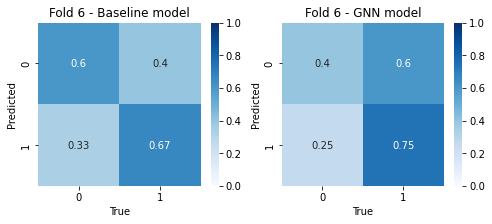

Baseline 7 0.7741935483870968 0.7058823529411765 102 58
GNN 7 0.7328 0.7843 102 58


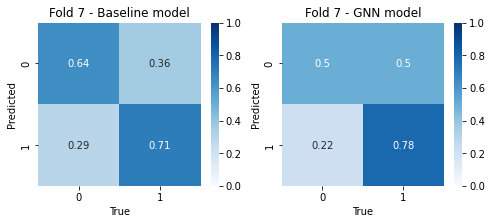

Baseline 8 0.7912087912087912 0.7058823529411765 102 58
GNN 8 0.7699 0.7647 102 58


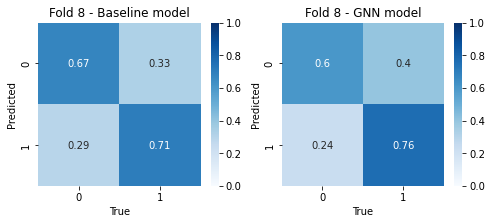

Baseline 9 0.7978723404255319 0.7352941176470589 102 58
GNN 9 0.7438 0.8529 102 58


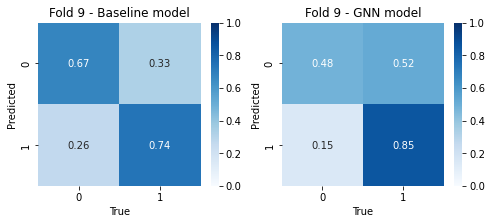

Baseline 10 0.8202247191011236 0.7227722772277227 101 58
GNN 10 0.7189 0.8449 101 58


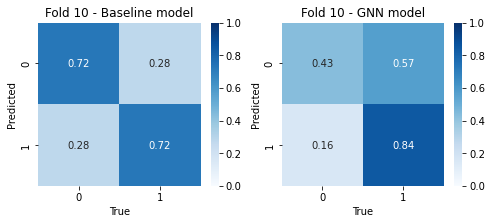

In [57]:
# En el fold 2 en la GNN me sale una cm rara que prob tenga que ver con que lo calculo
# con la media de las 3 runs de GraphGym
compare_conf_matrices(load_bas, load_GNN)